In [17]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
k = 4
np.random.seed(42)

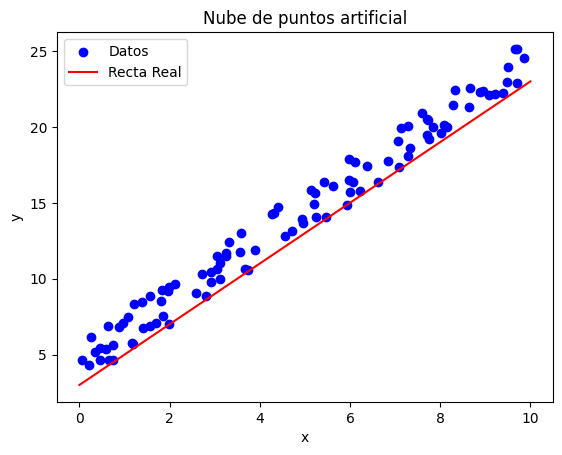

In [18]:
m = 100 #100 puntos
#Generar los valores aleatorios de x entre 0 y 10
x = np.random.rand(m)* 10

#slope & interception
a = 2
b = 3

#Maximas iteraciones
iteraciones_max = 200

sigma = 3 #ruido

y = a*x + b + np.random.rand(m) * sigma

#graficar los datos solo para verlos
plt.scatter(x,y, color='blue', label='Datos')
plt.plot([0,10], [b,a*10+b], color='red', label='Recta Real')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nube de puntos artificial')
plt.legend()
plt.show()

In [19]:
#INICIALIZACIÓN DE CENTROIDES
i=1
centroides = []#Lista de centroides
while i <= k:
    value = random.randint(0,len(x)-1) #1 punto al azar de los 100 que tenemos
    centroides.append([x[value],y[value]])#agregar el punto al diccionario
    i += 1

#Lógica para no repetir centroides

#print centroides
for centroide in centroides:
    print(centroide[0], centroide[1])


1.2203823484477883 8.32810658172191
8.948273504276488 22.364905289385664
2.1233911067827616 9.671143352258774
7.29606178338064 20.04379016736493


In [20]:
def Calcular_distancia(x_punto,y_punto, centroides,k):
    distancias = []
    i = 0
    while i < k:
        distancia = (x_punto - centroides[i][0])**2 + (y_punto - centroides[i][1])**2
        distancia = math.sqrt(distancia)
        distancias.append(distancia)
        i += 1
    
    
    
    minima = min(distancias)
    cluster_escogido = distancias.index(minima) 
    return cluster_escogido

def Calcular_distancia_centroides(centroides_antiguos, centroides,k):
    distancias = []
    i = 0
    while i < k:
        distancia = (centroides_antiguos[i][0] - centroides[i][0])**2 + (centroides_antiguos[i][1] - centroides[i][1])**2
        distancia = math.sqrt(distancia)
        distancias.append(distancia)
        i += 1
    return distancias

In [21]:
#Crear lista de clusters
Clusters = []
i=0
while i < k:
    cluster = [] #Lista de los puntos que se añaden al grupo
    Clusters.append(cluster)
    i += 1
#Añadir puntos a clusters
def Hacer_Clusters(coordenadas_x,coordenadas_y,centroides, Clusters):
    i = 0
    while i < len(coordenadas_x):
        punto = [coordenadas_x[i],coordenadas_y[i]]
        cluster_escogido = Calcular_distancia(coordenadas_x[i],coordenadas_y[i], centroides,k)
        Clusters[cluster_escogido].append(punto)
        i += 1


    

In [22]:
#Recalcular centroides
for centroide in centroides:
    print(centroide[0], centroide[1])

print('______________')

def Recalcular_Centroides(k, Clusters, centroides):
    suma_x = 0
    suma_y = 0
    i = 0
    centroides_antiguos = [c[:] for c in centroides]
    while i < k:
        j = 0
        suma_x=0
        suma_y=0
        while j < len(Clusters[i]):
            suma_x += Clusters[i][j][0]
            suma_y += Clusters[i][j][1]
            j+=1
        if len(Clusters[i]) != 0:
            centroides[i][0] = suma_x/(len(Clusters[i]))
            centroides[i][1] = suma_y/(len(Clusters[i]))
        else:
            value = random.randint(0,len(x)-1)
            centroides[i] = [x[value],y[value]]
            
        i+=1
    Distancias_Clusters=Calcular_distancia_centroides(centroides_antiguos, centroides, k)
    continue_bool = any(dist > 0.001 for dist in Distancias_Clusters)
    return continue_bool
    


for centroide in centroides:
    print(centroide[0], centroide[1])




1.2203823484477883 8.32810658172191
8.948273504276488 22.364905289385664
2.1233911067827616 9.671143352258774
7.29606178338064 20.04379016736493
______________
1.2203823484477883 8.32810658172191
8.948273504276488 22.364905289385664
2.1233911067827616 9.671143352258774
7.29606178338064 20.04379016736493


In [23]:
def k_means(k,Clusters,centroides,x_punto,y_punto,iteraciones_max):
    i = 0
    continue_bool = True
    while i < iteraciones_max and continue_bool is True:
        for cluster in Clusters:
            cluster.clear()
        Hacer_Clusters(x_punto, y_punto, centroides, Clusters)
        continue_bool = Recalcular_Centroides(k, Clusters,centroides)
        '''
        print(f"Iteración {i+1}:")
        for c in centroides:
            print(c)'''
        i+=1


In [24]:
k_means(k,Clusters,centroides,x,y,iteraciones_max)

<h2>ELBOW Method</h2>
Para calcular el <b>numero de clusters</b> en nuestro algoritmo

In [25]:
#Clusters -> cluster -> puntos del cluster
def Calcular_WCSS(Clusters, centroides):
    sse = 0
    for i,cluster in enumerate(Clusters):
        for punto in cluster:
            distancia = (punto[0] - centroides[i][0])**2 + (punto[1] - centroides[i][1])**2
            sse+= distancia
    return sse

distancias = Calcular_WCSS(Clusters, centroides)
print(distancias)

273.9189133287317


In [26]:
sse = []
for i in range (1,16):
    k=i
    Clusters = [[] for _ in range(k)]
    centroides = [[random.choice(x), random.choice(y)] for _ in range(k)]
    
    k_means(k,Clusters,centroides,x,y,iteraciones_max)
    distancia = Calcular_WCSS(Clusters, centroides)
    sse.append(distancia)


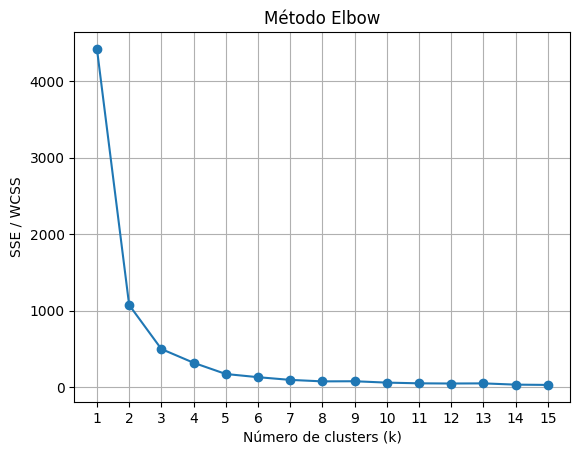

In [27]:

plt.plot(range(1, 16), sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE / WCSS')
plt.title('Método Elbow')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()



<h2>SILHOUETTE Method</h2>
Para calcular el <b>numero de clusters</b> en nuestro algoritmo

In [28]:

def Distancia_Promedio(punto, cluster_actual):
    distancia_promedio = 0
    for x in cluster_actual:
        if x != punto:
            distancia = (punto[0] - x[0])**2 + (punto[1] - x[1])**2
            distancia = math.sqrt(distancia)
            distancia_promedio += distancia
    distancia_promedio = distancia_promedio / (len(cluster_actual)-1)
    return distancia_promedio
    
def Distancia_Minima_Otros_Cluster(punto, Clusters, cluster):
    distancias = []
    for otro_cluster in Clusters:
        if otro_cluster != cluster and len(otro_cluster) > 0:
            distancia = Distancia_Promedio(punto, otro_cluster)
            distancias.append(distancia)
    distancia_menor = min(distancias)
    return distancia_menor


#Clusters -> cluster -> puntos del cluster
def Silhouette(Clusters, centroides):
    scores = []
    a = 0
    b = 0
    scores = []
    for cluster in Clusters:
        for punto in cluster:
            a = Distancia_Promedio(punto, cluster)
            b = Distancia_Minima_Otros_Cluster(punto, Clusters, cluster)
            S = (b - a) / max(a,b)
            scores.append(S)
    Global = sum(scores)/len(scores)
    return Global
            
            

In [29]:
Globals = []
for i in range (2,16):
    k=i
    Clusters = [[] for _ in range(k)]
    centroides = [[random.choice(x), random.choice(y)] for _ in range(k)]
    
    k_means(k,Clusters,centroides,x,y,iteraciones_max)
    Global = Silhouette(Clusters, centroides)
    Globals.append(Global)


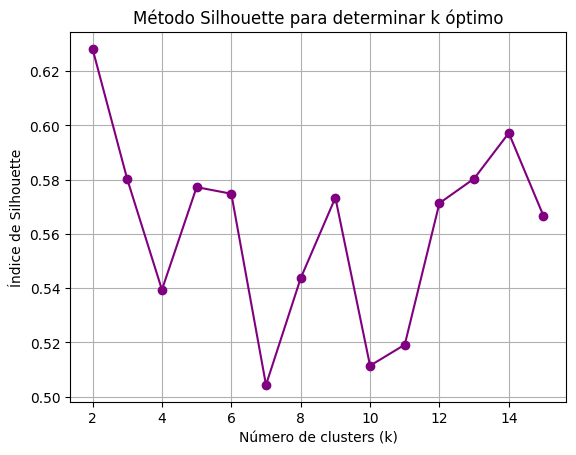

In [30]:
k_values = list(range(2, 16))  # Tus valores de k
plt.plot(k_values, Globals, marker='o', color='purple')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de Silhouette')
plt.title('Método Silhouette para determinar k óptimo')
plt.grid(True)
plt.show()


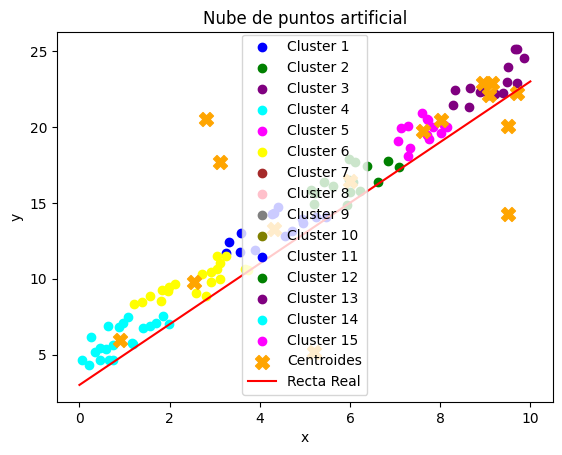

In [31]:
Clusters = [[] for _ in range(k)]
centroides = [[random.choice(x), random.choice(y)] for _ in range(k)]
k = 6 
k_means(k,Clusters,centroides,x,y,iteraciones_max)
# Definir colores (puedes agregar más si tienes más clusters)
colores = ['blue', 'green', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive']

# Graficar cada cluster con su color
for i, cluster in enumerate(Clusters):
    cluster_x = [p[0] for p in cluster]
    cluster_y = [p[1] for p in cluster]
    plt.scatter(cluster_x, cluster_y, color=colores[i % len(colores)], label=f'Cluster {i+1}')

# Graficar los centroides
centroides_x = [c[0] for c in centroides]
centroides_y = [c[1] for c in centroides]
plt.scatter(centroides_x, centroides_y, color='orange', s=100, marker='X', label='Centroides')

# Graficar la recta real
plt.plot([0,10], [b, a*10+b], color='red', label='Recta Real')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Nube de puntos artificial')
plt.legend()
plt.show()